In [4]:
# Printing ML data
import seaborn as sns
from setup import app_utils as au

df = au._create_training_data()
x = df["direct_normal_irradiance_instant"].to_numpy().reshape(-1,1)
y = df["generation_mw"].to_numpy().reshape(-1,1)

Execute Read
Execute Read


In [5]:
import statsmodels.api as sm

#define predictor and response variables

#add constant to predictor variables
x_sm = sm.add_constant(x)
#fit linear regression model
model = sm.OLS(y, x_sm).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     190.4
Date:                Sat, 24 Jun 2023   Prob (F-statistic):           1.99e-28
Time:                        16:55:18   Log-Likelihood:                -682.82
No. Observations:                 151   AIC:                             1370.
Df Residuals:                     149   BIC:                             1376.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8302      2.682      0.310      0.7

In [6]:
df.corr()

,direct_normal_irradiance_instant,generation_mw
direct_normal_irradiance_instant,1.000000,0.749014
generation_mw,0.749014,1.000000


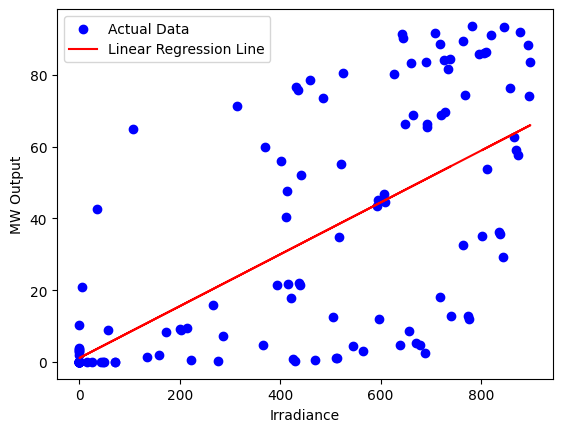

In [7]:
# Plot the data points
import pickle
import matplotlib.pyplot as plt
plt.scatter(df["direct_normal_irradiance_instant"], df["generation_mw"], color='b', label='Actual Data')
model = pickle.load(open("trained_model.pickle", "rb"))

# Make predictions using the trained model
predictions = model.predict(x)

# Plot the linear regression line
plt.plot(x, predictions, color='r', label='Linear Regression Line')

# Add labels and legend
plt.xlabel('Irradiance')
plt.ylabel('MW Output')
plt.legend()

# Show the plot
plt.show()
